In [251]:
#import libraries
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [252]:
#constants
SHAPE = (200, 200)
PATH = r"D:\Mask Detection\Mask-Detection\data"

In [255]:
mask_imgs = []
no_mask_imgs = []
fp_m = []
fp_nm = []


#iterate through directory assigning images to array categories
for dir in os.listdir(PATH):
    if dir == 'without_mask':
        for filename in os.listdir(PATH + '\\' + str(dir)):
            img = os.path.join(PATH + '\\' + str(dir), filename)
            img = load_img(img, target_size = SHAPE, grayscale = True) 
            img = img_to_array(img)
            no_mask_imgs.append(img)
        else:
            img = os.path.join(PATH + '\\' + str(dir), filename)
            img = load_img(img, target_size = SHAPE, grayscale = True)
            img = img_to_array(img)
            mask_imgs.append(img)             

In [268]:
#standardization converting to numpy array & 0-1 scale
mask_imgs = np.asarray(mask_imgs) / 255.0
no_mask_imgs = np.asarray(no_mask_imgs) / 255.0

In [272]:
mask_imgs.shape

(686, 200, 200, 1)

In [278]:
#if you want to put pixels into df
df = pd.DataFrame(mask_imgs.reshape(mask_imgs.shape[0], 200*200))

In [310]:
#assign column names
leng = df.shape[1]
df.columns = ['pixel ' + str(i) for i in range(leng)]

In [311]:
df.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 39990,pixel 39991,pixel 39992,pixel 39993,pixel 39994,pixel 39995,pixel 39996,pixel 39997,pixel 39998,pixel 39999
0,0.023529,0.023529,0.023529,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.019608,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.000000,0.000000,0.000000,0.000000
1,0.854902,0.847059,0.847059,0.843137,0.839216,0.835294,0.831373,0.831373,0.819608,0.807843,...,0.098039,0.098039,0.090196,0.090196,0.090196,0.101961,0.105882,0.098039,0.098039,0.094118
2,0.694118,0.701961,0.690196,0.678431,0.690196,0.698039,0.694118,0.686275,0.682353,0.678431,...,0.584314,0.647059,0.615686,0.494118,0.584314,0.627451,0.635294,0.662745,0.643137,0.517647
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.992157,0.996078,0.992157,0.988235,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.333333,0.415686,0.301961,0.345098,0.243137,0.639216,0.768627,0.647059,0.098039,0.313726


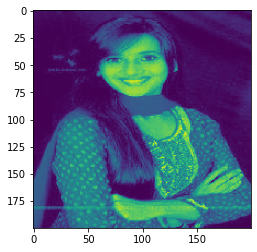

In [327]:
#sample img
img = plt.imshow(mask_imgs[0][:, :, 0])

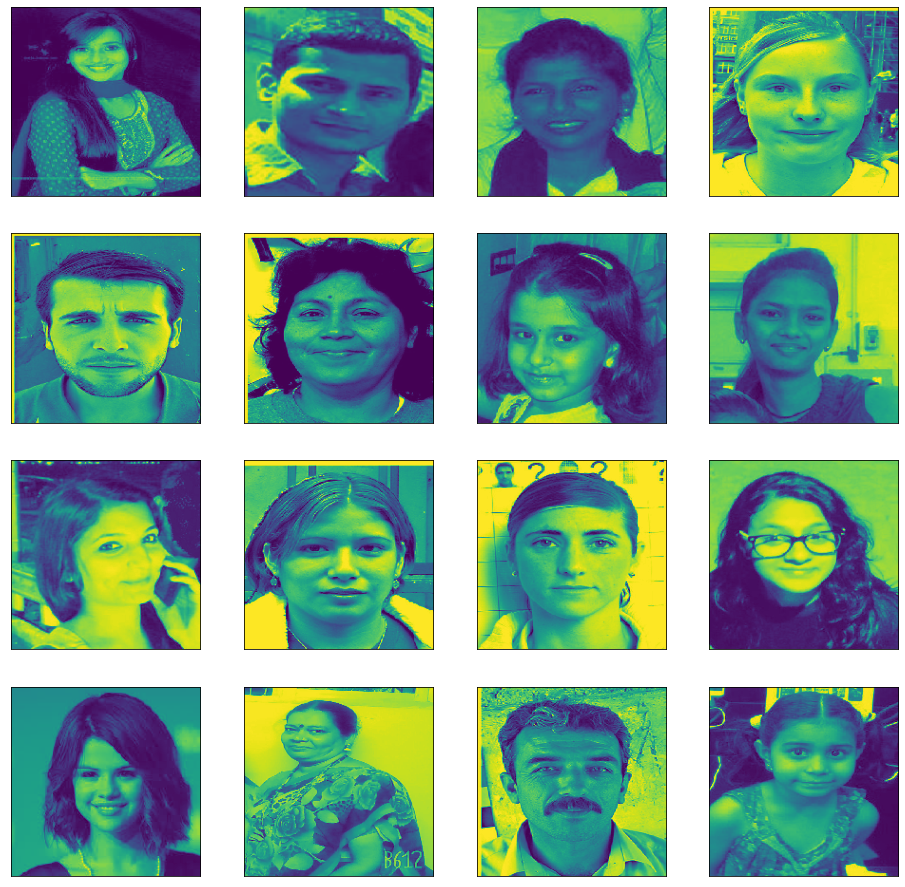

In [338]:
#sample imgs no masks
plt.figure(figsize = (16,16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mask_imgs[i][:,:,0])
plt.show()

In [339]:
no_mask_imgs.shape

(1, 200, 200, 1)

In [340]:
mask_imgs.shape

(686, 200, 200, 1)